In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [15]:
Question 1 [20%]
You have a data file called TCGA.csv, which has the gene expression dataset of some patients with liver cancer from the TCGA project.

In [35]:
#1 Create a new data frame containing samples S15, S16, S17, S18, S19, S20 and gene columns.
df_column = pd.read_csv('C:/Users/dell/Downloads/TCGA.csv')
column_selected = [col for col in ['gene','S15', 'S16', 'S17', 'S18', 'S19', 'S20']]
select = df_column[column_selected]
select.head()

,gene,S15,S16,S17,S18,S19,S20
0,A1BG,26.4968,20.8938,27.3609,29.0844,24.3038,24.1362
1,A1CF,132.7501,4.0627,336.4982,42.3940,300.7595,51.7409
2,A2LD1,471.8068,121.0447,1354.0664,59.1628,1693.7975,91.8562
3,A2M,57088.5470,41268.4910,15698.8341,38610.7374,17598.8304,30405.7241
4,A4GALT,1005.3252,1335.4614,765.6968,1833.2740,589.3671,957.8463


In [37]:
#Using the data in 1. above, add a new column called group by dividing the values of S18 into high and low based on the median value.
median_of_s18 = df_column['S18'].median()
df_new = df_column.copy()
df_new['group'] = np.where(df_new["S18"] > median_of_s18,"High", "Low")
df_new.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S13,S14,S15,S16,S17,S18,S19,S20,gene,group
0,34.1387,33.4288,39.7795,45.2507,28.2377,63.5373,32.2396,67.3712,34.4538,13.8398,...,24.5358,24.7415,26.4968,20.8938,27.3609,29.0844,24.3038,24.1362,A1BG,Low
1,552.5210,465.9669,810.9274,229.1667,347.1897,49.3354,0.5496,49.7578,129.5520,177.5618,...,240.8931,261.2761,132.7501,4.0627,336.4982,42.3940,300.7595,51.7409,A1CF,Low
2,3764.1912,206.0051,1979.9521,73.5449,929.5726,116.1298,204.8090,100.0352,235.5430,67.4735,...,942.1857,173.3663,471.8068,121.0447,1354.0664,59.1628,1693.7975,91.8562,A2LD1,Low
3,12399.3120,28250.4198,14624.8406,36164.3913,30884.4496,38882.8068,13485.3201,29138.3708,62758.8334,67530.2002,...,46192.3032,67775.4125,57088.5470,41268.4910,15698.8341,38610.7374,17598.8304,30405.7241,A2M,High
4,633.9286,1040.3944,1098.0110,887.3698,695.5504,1227.6374,1584.5012,964.3329,1244.6020,954.3581,...,719.7415,996.6997,1005.3252,1335.4614,765.6968,1833.2740,589.3671,957.8463,A4GALT,High


In [49]:
#Extract the list of genes with values in S20 column lower than 10, and the group in 2 is high.
list_genes = df_column[(df_new["S20"] < 10) & (df_new["group"] == "High")]
gene_list = list_genes["gene"].tolist()
gene_list

['CKMT2', 'CTXN3', 'GSTM1', 'HMGCS2', 'KLB', 'LGALS4', 'PAH', 'SORCS3', 'UMOD']

In [61]:
#Create a new data frame from 2. above, with groups equal to low and values less than 3 in S16.
new_dataframe = df_new[(df_new["group"] == "Low") & (df_new["S16"] < 3)]
new_dataframe

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S13,S14,S15,S16,S17,S18,S19,S20,gene,group
25,45.6933,0.3181,8.1476,0.6510,6.4403,0.9580,104.9739,0.0000,8.0567,0.5889,...,23.7955,6.6007,1.5215,1.7411,18.3767,0.7125,6.0759,69.6267,ABCA13,Low
32,149.6849,143.4478,138.9887,40.6901,303.2787,147.0483,6.8700,26.4201,218.1760,54.4759,...,367.2150,150.7151,342.7159,2.3215,72.2818,6.4125,126.5823,439.4787,ABCA6,Low
117,13.6555,1.5903,17.7330,2.2786,20.4918,34.9659,117.0651,22.0167,52.8521,0.8834,...,24.6769,8.8009,31.1906,1.7411,22.4604,3.2063,27.3418,21.0796,ACCN1,Low
133,110.8193,0.3181,67.5773,0.0000,53.8642,0.4790,33.8005,0.0000,30.2933,0.2945,...,31.1398,4.4004,28.1476,1.1608,52.2716,0.0000,60.2532,0.0000,ACOT12,Low
187,28.3613,6.3613,39.7795,5.5339,59.1335,7.1848,9.3432,13.2100,62.8424,56.5371,...,35.5464,11.0011,29.6691,1.7411,31.0362,4.6313,38.4810,2.8745,ACVR1C,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14897,40.4412,2.5445,61.3468,1.3021,9.3677,0.0000,0.5496,0.4403,6.4454,5.0059,...,44.3596,7.7008,9.5093,1.1608,37.9786,3.5625,26.3291,6.7072,ZCCHC16,Low
15243,31.5126,0.3181,75.2456,0.3255,165.1054,2.8739,22.2589,1.7613,82.8231,0.8834,...,143.6545,28.6029,75.6942,2.9019,151.9142,2.4938,88.1013,1.2776,ZNF488,Low
15291,21.0084,2.5445,1.4378,1.6276,7.0258,0.9580,35.9989,0.4403,14.5021,0.2945,...,10.2820,11.5512,13.3130,0.0000,6.9423,1.7813,27.3418,8.9429,ZNF556,Low
15518,5.7773,11.1323,8.6269,144.5312,2.3419,18.6804,57.7082,1.7613,22.8811,3.5336,...,6.7568,3.8504,37.2765,1.7411,6.1256,0.3563,13.1646,6.0684,ZPLD1,Low


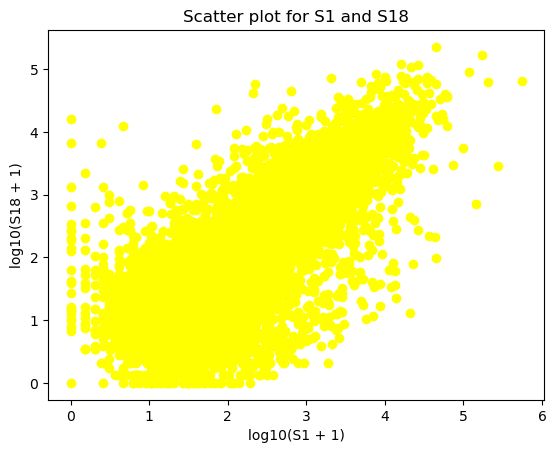

In [63]:
#Create a scatter plot for the expression in S1 against S18 (apply log10 transformation to the plot).
plot.scatter(np.log10(df_column['S1'] + 1), np.log10(df_column['S18'] + 1), c='yellow')
plot.xlabel('log10(S1 + 1)')
plot.ylabel('log10(S18 + 1)')
plot.title('Scatter plot for S1 and S18')
plot.show()

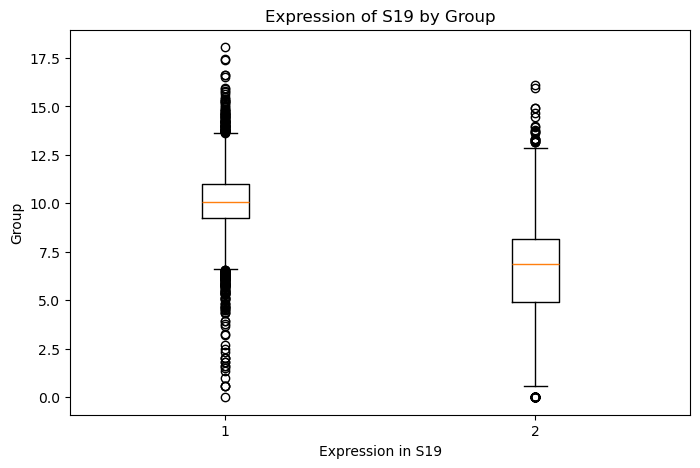

In [67]:
#Create a boxplot for expression in S19 against the group in data 2. above. Comment on your observation.
data = np.log2(df_new[df_new["group"] == "High"]['S19'] + 1)
data1 = np.log2(df_new[df_new["group"] == "Low"]['S19'] + 1)
data = [data, data1]
fig,ax = plot.subplots(figsize = (8,5))
ax.boxplot(data)
plot.title('Expression of S19 by Group')
plot.xlabel('Expression in S19')
plot.ylabel('Group')
plot.show()

In [ ]:
Question 2 [30%]
Write functions that do the following tasks:

That takes a DNA sequence (for example "CCTGTCAAAAGATATGT") and converts it to an RNA sequence. Then returns the DNA sequence, the RNA sequence and the length of this sequence using a list. [Hint: Convert all the T in DNA to U to make RNA. Use the "string".repalce() method] [10%]
Write a function that takes the size of a chromosome and creates a non-overlapping window of a size specified by an argument. Therefore, chromosome size 100 and size 20 return 1-20, 21-40, 41-60, 61-80, 81-100. This function should have an optional argument to either print the result on the screen or not. [10%]
Write a function to determine the maximum of four numbers given as a tuple argument. [10%]

In [69]:
#1 That takes a DNA sequence (for example "CCTGTCAAAAGATATGT") and converts it to an RNA sequence. Then returns the DNA sequence, the RNA sequence and the length of this sequence using a list. [Hint: Convert all the T in DNA to U to make RNA. Use the "string".repalce() method] [10%]
Sequence = "CCTGTCAAAAGATATGT"
def dna_to_rna(Sequence):
    rna_seq = Sequence.replace("T", "U")
    length = len(Sequence)
    return[" The new DNA seq is {} and the RNA seq is {} and total seq length is {}".format(Sequence, rna_seq, length)]
dna_to_rna(Sequence)

[' The new DNA seq is CCTGTCAAAAGATATGT and the RNA seq is CCUGUCAAAAGAUAUGU and total seq length is 17']

In [71]:
#2. Write a function that takes the size of a chromosome and creates a non-overlapping window of a size specified by an argument. Therefore, chromosome size 100 and size 20 return 1-20, 21-40, 41-60, 61-80, 81-100. This function should have an optional argument to either print the result on the screen or not. [10%]
def create_win(chr_size, window_size, print_res=False):
    list = []
    end = 0
    while end < chr_size:
        start = end+1
        end = min(end + window_size, chr_size)
        list.append(str(start) + "-" + str(end))
    return list

create_win(100,20)


['1-20', '21-40', '41-60', '61-80', '81-100']

In [73]:
#3.Write a function to determine the maximum of four numbers given as a tuple argument. [10%]
numbers = (2,3,4,5)
def Tuplefunc(numbers):
    if len(numbers) != 4:
        print("Tuple exceeds maximum values")
    else:
        return max(numbers)
Tuplefunc(numbers)

5

In [ ]:
Question 3 [20%]
We have defined a Cell class below. Write a subclass called adTCell that extends the Cell class. It should have self.protein, self.size set to 1, and self.max_rate attributes. The self.protein attribute should be a list.

Code the following method:

1.init(*****, size) constructor. Identify and include all the parameters to ensure that the cell .init() is included.
2.Set self.size to size and self.max_rate to 0.5
3.add_protein() that takes a protein name as an argument and adds it to the self.protein attribute.
4.summary() that prints the total number of organelle, genes and proteins.
5.grow() that takes a growth rate argument and increases the self.size attribute by that rate if it is smaller than the self.max_rate, otherwise complain and do nothing.


In [75]:
# This is the cell class to use for Question 3 above.

class Cell:
    """ A class representing a cell"""
    
    # Constructor 
    def __init__(self, name):
        """Input layer"""
        self.name = name
        self.organelles = []    # creates a new empty list for each cell
        self.genes = []         # same as above
    
    # The string method
    def __str__(self):
        return ("A model of a cell, current instance is {} ".format(self.name))
    
    # Methods
    def add_organelle(self, organelle):
        self.organelles.append(organelle)
    
    def add_gene(self, gene):
        self.genes.append(gene)
        
    def view_cell(self):
        return self.organelles, self.genes

In [77]:
class adTCell(Cell):
    def __init__(self, name, size):
        super().__init__(name)
        self.protein = []       
        self.size = size        
        self.max_rate = 0.5   
    def add_protein(self, protein):
        self.protein.append(protein)
    def summary(self):
        print(f"Total No. of organelles: {len(self.organelles)}")
        print(f"Total No. of genes: {len(self.genes)}")
        print(f"Total No. of proteins: {len(self.protein)}")
    def grow(self, growth_rate):
        if growth_rate <= self.max_rate:
            self.size += growth_rate
        else:
            print(f"Growth rate exceeds.Cell size unchanged.")

In [79]:
ad_cell = adTCell(name ="Nucleus", size=1)
ad_cell.add_organelle("Golgi body")
ad_cell.add_organelle("Mitochondria")
ad_cell.add_protein("BRCA1")
ad_cell.add_protein("BRCA2")
ad_cell.add_gene("EGFR")
ad_cell.add_gene("CKDN2A")
ad_cell.summary()
ad_cell.grow(0.3)

Total No. of organelles: 2
Total No. of genes: 2
Total No. of proteins: 2


In [81]:
#1
new_seq = "TTGGTCATCCTAGACACGCGCCCTACCTGTCAAAATCTAAAATTCATCATACCCTGCGGACGGTGCTTCTGTGCCGAGGCGCAGGCCGATATGTTTCTAC"
def dna_analysis(new_seq):
    base = list(new_seq)
    length = len(base)
    A_count = base.count('A')
    T_count = base.count('T')
    G_count = base.count('G')
    C_count = base.count('C')
    return "The vector with each base {} , (the total length of sequence is {} and the amount of each of the nucleotides A-{}, T-{}, G-{}, C-{})".format(base ,length, A_count, T_count, G_count,C_count)

dna_analysis(new_seq)
    

"The vector with each base ['T', 'T', 'G', 'G', 'T', 'C', 'A', 'T', 'C', 'C', 'T', 'A', 'G', 'A', 'C', 'A', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'T', 'A', 'C', 'C', 'T', 'G', 'T', 'C', 'A', 'A', 'A', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'A', 'T', 'T', 'C', 'A', 'T', 'C', 'A', 'T', 'A', 'C', 'C', 'C', 'T', 'G', 'C', 'G', 'G', 'A', 'C', 'G', 'G', 'T', 'G', 'C', 'T', 'T', 'C', 'T', 'G', 'T', 'G', 'C', 'C', 'G', 'A', 'G', 'G', 'C', 'G', 'C', 'A', 'G', 'G', 'C', 'C', 'G', 'A', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'C', 'T', 'A', 'C'] , (the total length of sequence is 100 and the amount of each of the nucleotides A-22, T-26, G-22, C-30)"

In [81]:
Question 4 [30%]
In your R assessment 3 you were asked to do functions to perform some tasks. Please, convert the R code for the below question to the python code to do the same tasks.

Write functions that can do the following:

1. Take a string containing a DNA sequence, and convert this to a vector, which each entry is one base. a. Calculate the length of the sequences. b. The amount of each of the four nucleotides, A, T, G and C. c. Return these as a tuple with each item named (i.e. length, A, T, G, C) [15%]
2. Write a function that takes a DNA sequence and substitutes one nucleotide specified by an argument (default value “A”) for another nucleotide specified by an argument (default value “T”, in other words, the default of this function changes “A” to “T”). This function should return a dictionary with both the original and the new string of nucleotides. [15%]

"The vector with each base ['T', 'T', 'G', 'G', 'T', 'C', 'A', 'T', 'C', 'C', 'T', 'A', 'G', 'A', 'C', 'A', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'T', 'A', 'C', 'C', 'T', 'G', 'T', 'C', 'A', 'A', 'A', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'A', 'T', 'T', 'C', 'A', 'T', 'C', 'A', 'T', 'A', 'C', 'C', 'C', 'T', 'G', 'C', 'G', 'G', 'A', 'C', 'G', 'G', 'T', 'G', 'C', 'T', 'T', 'C', 'T', 'G', 'T', 'G', 'C', 'C', 'G', 'A', 'G', 'G', 'C', 'G', 'C', 'A', 'G', 'G', 'C', 'C', 'G', 'A', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'C', 'T', 'A', 'C'] , (the total length of sequence is 100 and the amount of each of the nucleotides A-22, T-26, G-22, C-30)"

In [83]:
#2
def nucleotide(new_seq, original = "A", replaced = "T"):
    new_sequence = new_seq.replace(original, replaced)
    return {"Original Sequence": new_seq, "Modified Sequence": new_sequence}

nucleotide(new_seq)

{'Original Sequence': 'TTGGTCATCCTAGACACGCGCCCTACCTGTCAAAATCTAAAATTCATCATACCCTGCGGACGGTGCTTCTGTGCCGAGGCGCAGGCCGATATGTTTCTAC',
 'Modified Sequence': 'TTGGTCTTCCTTGTCTCGCGCCCTTCCTGTCTTTTTCTTTTTTTCTTCTTTCCCTGCGGTCGGTGCTTCTGTGCCGTGGCGCTGGCCGTTTTGTTTCTTC'}